This is a short example that I am thinking of putting in the Parameter Estimation section of the tutorial (NB2). Justin Bois suggested busting out sampling at this point and it may be nice to introduce PyMC3 with this small example of Finch beak lengths.

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
%matplotlib inline
sns.set()

In [2]:
# Import and view head of data
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [3]:
# Construct the model
with pm.Model() as finch_model:
    # Prior on mean, variance
    μ = pm.Normal('μ', mu=10, sd=5)
    σ = pm.Lognormal('σ', 0, 10)
    # Gaussian Likelihood
    y = pm.Normal('y', mu=μ, sd=σ, observed=df_12.blength)

Average Loss = 492.52: 100%|██████████| 10000/10000 [00:08<00:00, 1233.94it/s]
Finished [100%]: Average Loss = 492.42


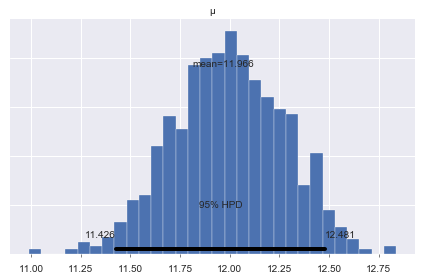

In [4]:
# Sample from that shit!
with finch_model:
    samples = pm.fit(random_seed=42).sample(1000)
 
# Plot posterior
pm.plot_posterior(samples, varnames=['μ']);